<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 07 **
** ┗ Credit card debt unprecedented customer prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Credit card usage pattern search」
* 🥈Session 2 -「Failure analysis according to the level of use」
* 🥇SESSION 3 -「ML Use Debt Customer Prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount or folder click Google Drive Connection
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ▶ Path setting (※ If you activate the COLAB, the COLAB Notebooks folder is automatically generated)
import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/07_Credit Card Delinquency Prediction')
# '/Content/Drive/MyDrive/Colab Notebooks/← Here is your path input, Part3_LECTURE_FASTCAMPUS/Chapter07' ← Change X
os.getcwd()

'/content/drive/MyDrive/DA portfolio/DA_colab/07_Credit Card Delinquency Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 💳 (Service Operator, Risk Management)

``
Card Company A is rotten because of the increasing number of non -default customers.Competitors such as simple payment companies such as Naver Pay and Kakao Pay appeared
In difficult situations, losses due to non -default customers are increasing.As a result, customers who are expected to fail credit card debt are blacklists
I want to manage and reduce the limit to prevent the maximum loss.

``


> ** Looking at the data **

* Customer ID Card Spending Data
* Data specification ⬇

| ID | LIMIT_BAL | Sex | Education | Marriage | Age |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Customer ID | Credit limit | Gender (1-male, 2-female) | Education level (1-graduate, 2-university, 3-high school, 4-guitar, 5-unknown, 6-unity) | Marriage (1-marriage, 2-single, 3-guitar) ||
| Pay_0 | PAY_2 | PAY_3 | Pay_4 | Pay_5 | Pay_6 |
| September 2005 repayment status (-2-non-free consumption, -1-fixed payment, 0-rebeling creddit, 1-month delay, 9-9 months payment) | 05 repayment status | Repayment of July 05 | Rehabilitation in June 05 |
| Bill_amt1 | Bill_amt2 | Bill_amt3 | Bill_amt4 | Bill_amt5 | Bill_amt6 |
| Application of September 2005 | August 2005, July 2005, July 2005, June 2005, June 2005 claim amount | May 2005 claim amount |
| Pay_amt1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | Pay_amt6 |
| Payment amount paid in September 2005 | August 2005 paid in July 2005 | June 2005 Payment amount | Payment amount in May 2005 |
| Default Payment Next Month |
| Debt failure |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_excel('chapter07_credit_card_pay.xlsx')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Loss due to failure to debt credit card
``

> ** Expected effect **

``
▶ Reduction of losses due to failure to fulfill debt
``

> ** Solution **

``
▶ Customer prediction and blacklist management (credit limit adjustment)
▶ Session 1 🥉
-Chind customer profile information confirmation and derivative variables and verification
▶ Session 2 🥈
-Customer profile information, exploration of non -fulfillment rates according to the use limit
▶ Session 3 🥇
-ML algorithms use debt unhappy customer prediction
``

> ** Performance measurement **

``
▶ Loss loss loss rate after blacklist management (%)
``

> ** Public application **

``
▶ Create data Mart for input to Model every month
▶ Data Mart predicted MODEL after INPUT extracted for predicted customer group extract
▶ Defense loss through credit limit adjustment and blacklist management for extracted customers
``

> ** Main code preview **

``
▶ Session 1 → np.where (), SNS.CATPLOT (), Replace ()
▶ Session 2 → Value_counts (), D.pivot_table (), Reset_index (), Sort_values ​​()
▶ Session 3 → RandomForestClassifier, ROC_AUC_SCORE ()
``


## ** 🥉Session 1 **
** ┗ Credit card usage pattern search **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 30,000 row, 25 coles
print('df', df.shape)

df (30000, 25)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [ ]:
# ▶ Outlier confirmation, negative value check
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df['default payment next month'].value_counts()

,count
default payment next month,
0,23364
1,6636


In [ ]:
# ▶ Debt failure rate 22.12%
(6636/(23364+6636)) * 100

22.12

### · Check customer profile information
---


In [ ]:
# ▶ Customer Profile Information COL
df.columns[1:5]

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

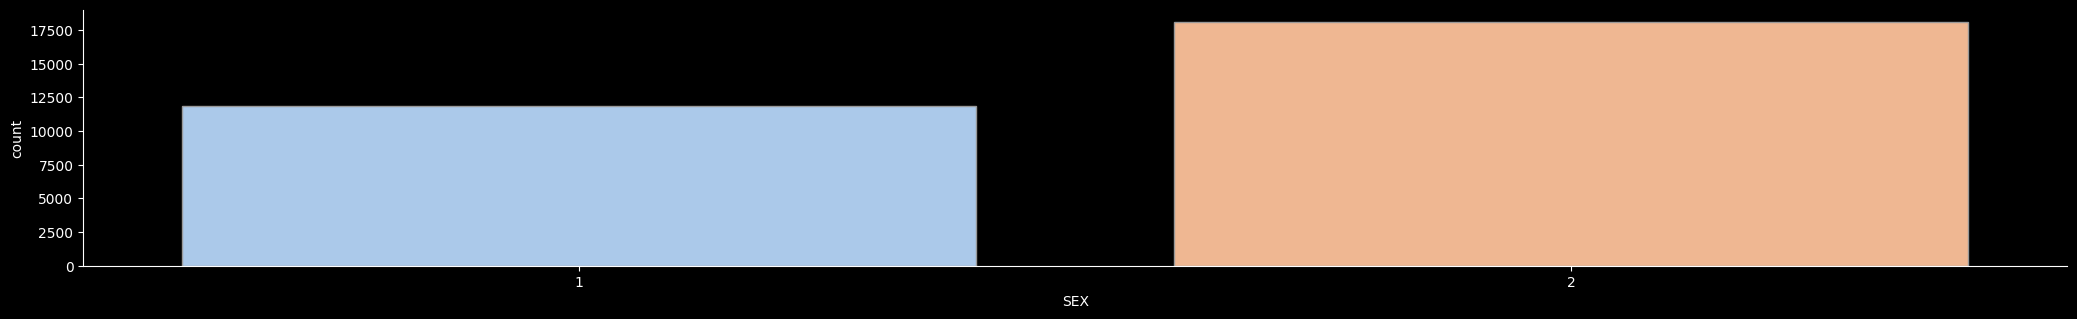

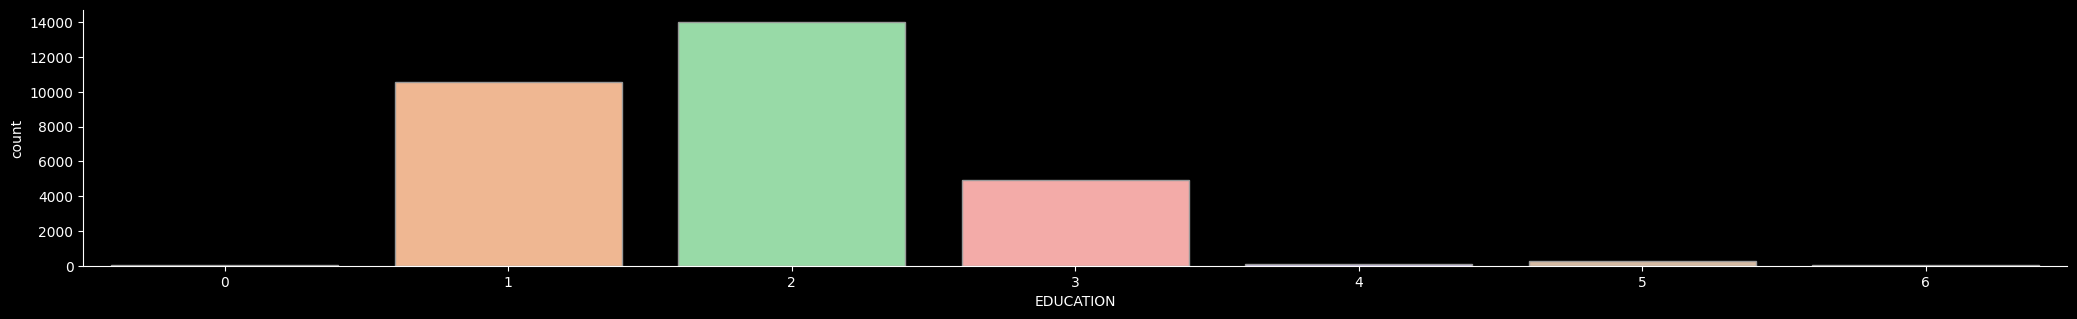

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ Gender (1-male, 2-female)
sns.catplot(x="SEX", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)

# ▶ Education level (1-Graduate School 2-University 3-High School 4-Other)
sns.catplot(x="EDUCATION", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)

In [ ]:
# ▶ Education level 0, 4, 5, and 6 are too low in data, so it is integrated into one category
import numpy as np
df['EDUCATION'] = np.where((df['EDUCATION']>=4) | (df['EDUCATION']==0) , 4, df['EDUCATION'])

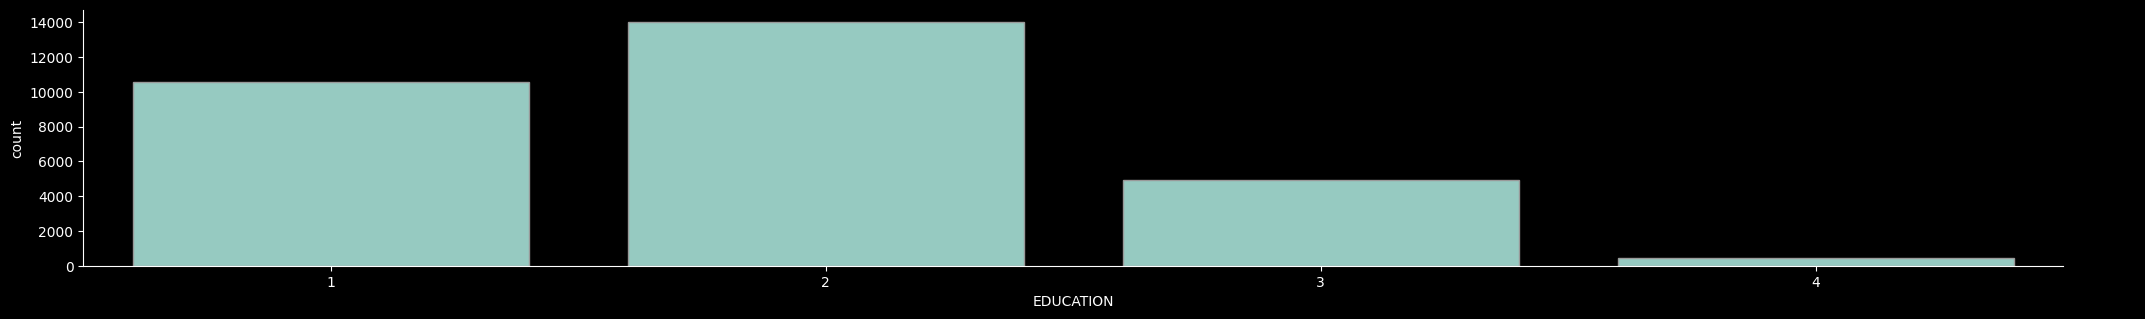

In [ ]:
# ▶ Education level (1-Graduate School 2-University 3-High School 4-Other)
sns.catplot(x="EDUCATION", kind="count", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)

### · Check the payment level compared to the billing amount
---


In [ ]:
# ▶ Check the payment level compared to the claim level
# ▶ If the payment is low, the probability of delinquency will be high.
df[['ID', 'BILL_AMT1', 'PAY_AMT1', 'BILL_AMT2', 'PAY_AMT2', 'BILL_AMT3', 'PAY_AMT3', 'BILL_AMT4', 'PAY_AMT4', 'BILL_AMT5', 'PAY_AMT5', 'BILL_AMT6', 'PAY_AMT6']]

,ID,BILL_AMT1,PAY_AMT1,BILL_AMT2,PAY_AMT2,BILL_AMT3,PAY_AMT3,BILL_AMT4,PAY_AMT4,BILL_AMT5,PAY_AMT5,BILL_AMT6,PAY_AMT6
0,1,3913,0,3102,689,689,0,0,0,0,0,0,0
1,2,2682,0,1725,1000,2682,1000,3272,1000,3455,0,3261,2000
2,3,29239,1518,14027,1500,13559,1000,14331,1000,14948,1000,15549,5000
3,4,46990,2000,48233,2019,49291,1200,28314,1100,28959,1069,29547,1000
4,5,8617,2000,5670,36681,35835,10000,20940,9000,19146,689,19131,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,188948,8500,192815,20000,208365,5003,88004,3047,31237,5000,15980,1000
29996,29997,1683,1837,1828,3526,3502,8998,8979,129,5190,0,0,0
29997,29998,3565,0,3356,0,2758,22000,20878,4200,20582,2000,19357,3100
29998,29999,-1645,85900,78379,3409,76304,1178,52774,1926,11855,52964,48944,1804


In [ ]:
# ▶ Create a new COL to confirm the level of payment for the total claim for the past 6 months
df['PAY/BILL'] = round(((df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6'])
                  / (df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6'])) * 100, 1)

In [ ]:
df['PAY/BILL']

0         8.9
1        29.3
2        10.8
3         3.6
4        54.0
         ... 
29995     5.9
29996    68.4
29997    44.4
29998    55.2
29999     3.6
Name: PAY/BILL, Length: 30000, dtype: float64

In [ ]:
# ▶ If there is a customer with a total claim, it is expressed as INF, so it is removed through pretreatment
# ▶ In the case of NA, fill it with 0
df['PAY/BILL'] = df['PAY/BILL'].replace([np.inf, -np.inf], np.nan)
df['PAY/BILL'] = df['PAY/BILL'].fillna(0)

In [ ]:
# ▶ DATA processing
df['PAY/BILL'] = np.where(df['PAY/BILL']>100, 100, df['PAY/BILL'])
df['PAY/BILL'] = np.where(df['PAY/BILL']<0, 0, df['PAY/BILL'])

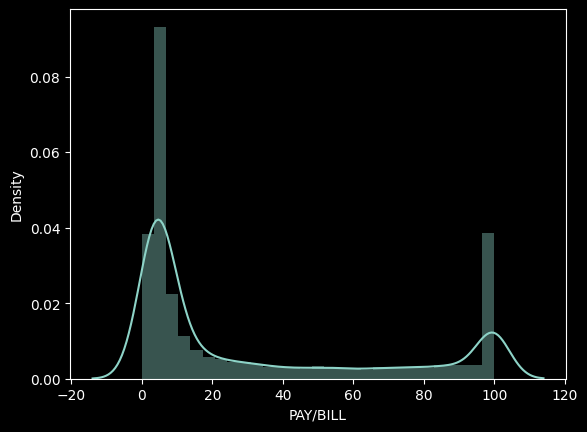

In [ ]:
# ▶ Most customers pay only at 20% of the total amount
sns.distplot(df['PAY/BILL']);

## ** 🥈Session 2 **
** ┗ Analysis of defaults for debt according to the level of use limit **
---


### · Customer profile
---


In [ ]:
# ▶ Analysis of defaults for debt according to gender
df_profile=pd.DataFrame(df['default payment next month'].groupby(df['SEX']).value_counts())
df_profile.columns=['cnt']
df_profile=df_profile.reset_index()
df_profile

,SEX,default payment next month,cnt
0,1,0,9015
1,1,1,2873
2,2,0,14349
3,2,1,3763


In [ ]:
# ▶ Pivot table
df_profile = pd.pivot_table(df_profile,                          # Pivot data frame
                      index = 'SEX',                             # Passes in the line
                      columns = 'default payment next month',    # Heat to enter the column position
                      values = 'cnt')                            # Open to be used as data
df_profile

default payment next month,0,1
SEX,,
1,9015.0,2873.0
2,14349.0,3763.0


In [ ]:
df_profile

default payment next month,0,1
SEX,,
1,9015.0,2873.0
2,14349.0,3763.0


In [ ]:
# ▶ Step 3
df_profile = df_profile.reset_index()
df_profile.columns.names=['']
df_profile

,SEX,0,1
0,1,9015.0,2873.0
1,2,14349.0,3763.0


In [ ]:
  # ▶ Step 4
  df_profile['ratio'] =   round((df_profile.iloc[:,2] / (df_profile.iloc[:,1] + df_profile.iloc[:,2])) * 100,1)

  df_profile=df_profile.sort_values(by=['ratio'], ascending=False)
  df_profile

,SEX,0,1,ratio
0,1,9015.0,2873.0,24.2
1,2,14349.0,3763.0,20.8


In [ ]:
# ▶ Education (1-Graduate School 2-University 3-High School 4-Other)
# ▶ Step 1
df_profile=pd.DataFrame(df['default payment next month'].groupby(df['EDUCATION']).value_counts())
df_profile.columns=['cnt']
df_profile=df_profile.reset_index()

# ▶ Step 2
df_profile = pd.pivot_table(df_profile,                        # Pivot data frame
                    index = 'EDUCATION',                       # Passes in the line
                    columns = 'default payment next month',    # Heat to enter the column position
                    values = 'cnt')                            # Open to be used as data

# ▶ Step 3
df_profile = df_profile.reset_index()
df_profile.columns.names=['']


# ▶ Step 4
df_profile['sign_ratio'] =   round((df_profile.iloc[:,2] / (df_profile.iloc[:,1] + df_profile.iloc[:,2])) * 100,1)
df_profile=df_profile.sort_values(by=['sign_ratio'], ascending=False)
df_profile

,EDUCATION,0,1,sign_ratio
2,3,3680.0,1237.0,25.2
1,2,10700.0,3330.0,23.7
0,1,8549.0,2036.0,19.2
3,4,435.0,33.0,7.1


### · Use limit -Debt failure analysis


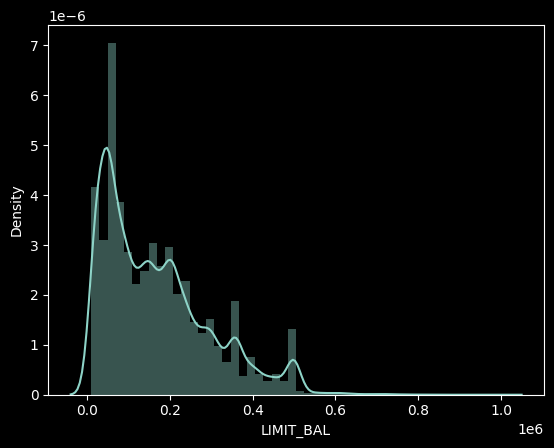

In [ ]:
# ▶ Check data distribution through distlot
sns.distplot(df['LIMIT_BAL']);

In [ ]:
df['LIMIT_BAL']

,LIMIT_BAL
0,20000
1,120000
2,90000
3,50000
4,50000
...,...
29995,220000
29996,150000
29997,30000
29998,80000


In [ ]:
# ▶ Numeric (continuous) variable section
# ▶ 100,000 or less, less than 100,000, less than 300,000, more than 300,000 and less than 500,000, more than 500,000 (4 group)


df['LIMIT_GP'] = np.where (df['LIMIT_BAL'] <= 100000, 1,
                           np.where(df['LIMIT_BAL'] <= 300000, 2,
                           np.where(df['LIMIT_BAL'] <= 500000, 3, 4)))

df[['ID', 'LIMIT_BAL', 'LIMIT_GP']]

,ID,LIMIT_BAL,LIMIT_GP
0,1,20000,1
1,2,120000,2
2,3,90000,1
3,4,50000,1
4,5,50000,1
...,...,...,...
29995,29996,220000,2
29996,29997,150000,2
29997,29998,30000,1
29998,29999,80000,1


In [ ]:
df['LIMIT_GP'].value_counts()

,count
LIMIT_GP,
2,12939
1,12498
3,4357
4,206


In [ ]:
# ▶ Credit limit> 100,000 or less (1 group), 100,000 or less and less than 300,000 (2 group), more than 300,000 and less than 500,000 (3 group), more than 500,000 (4 group)
# ▶ Step 1
df_profile=pd.DataFrame(df['default payment next month'].groupby(df['LIMIT_GP']).value_counts())
df_profile.columns=['cnt']
df_profile=df_profile.reset_index()

# ▶ Step 2
df_profile = pd.pivot_table(df_profile,                        # Pivot data frame
                    index = 'LIMIT_GP',                        # Passes in the line
                    columns = 'default payment next month',    # Heat to enter the column position
                    values = 'cnt')                            # Open to be used as data

# ▶ Step 3
df_profile = df_profile.reset_index()
df_profile.columns.names=['']


# ▶ Step 4
df_profile['sign_ratio'] =   round((df_profile.iloc[:,2] / (df_profile.iloc[:,1] + df_profile.iloc[:,2])) * 100,1)
df_profile=df_profile.sort_values(by=['sign_ratio'], ascending=False)
df_profile

,LIMIT_GP,0,1,sign_ratio
0,1,8814.0,3684.0,29.5
1,2,10592.0,2347.0,18.1
2,3,3775.0,582.0,13.4
3,4,183.0,23.0,11.2


## ** 🥇Session 3 **
** ┗ ML Use Debt Customer Prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY/BILL,LIMIT_GP
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,8.9,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,29.3,2
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,10.8,1
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,3.6,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,54.0,1


In [ ]:
# ▶ Feature (x) and Y data to learn modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# ▶ The group ping variables generated at the top are first removed and modeling proceeds.
X=df.drop(['ID','default payment next month', 'LIMIT_GP'], axis=1)
Y=df['default payment next month']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(21000, 24)
(21000,)
(9000, 24)
(9000,)


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
# ▶ Learning
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16355
           1       1.00      1.00      1.00      4645

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.38      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [ ]:
# ▶ ROC concept emergence
# ▶ Metric used to evaluate the performance of binary classifiers, and the closer to 100, the better the model performance (※)
# ▶ Suitable issues, the maximum performance of train and test sets prevents overpacking.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9999971764789508
roc_score_test : 0.7671117259799213


### · Hyper parameter tuning
---
* Adjusting options to increase model performance


In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400, 500],
           'max_depth' : [6, 8, 10, 12]
            }

# RandomforestClassifier
rf_clf = RandomForestClassifier(random_state = 123456, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='precision')
grid_cv.fit(x_train, y_train)

print('best parameter: ', grid_cv.best_params_)
print('best score: {:.4f}'.format(grid_cv.best_score_))

best parameter:  {'max_depth': 6, 'n_estimators': 400}
best score: 0.6815


In [ ]:
# ▶ Best Score standard study
rfc = RandomForestClassifier(n_estimators=500, max_depth=6, random_state = 123456)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     16355
           1       0.72      0.36      0.48      4645

    accuracy                           0.83     21000
   macro avg       0.78      0.66      0.69     21000
weighted avg       0.81      0.83      0.80     21000

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.68      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [ ]:
# ▶ Solving and matching
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.7913525685979046
roc_score_test : 0.7818938253959052


### · Identify important variables
---
* Finding important variables through feature IMP analysis


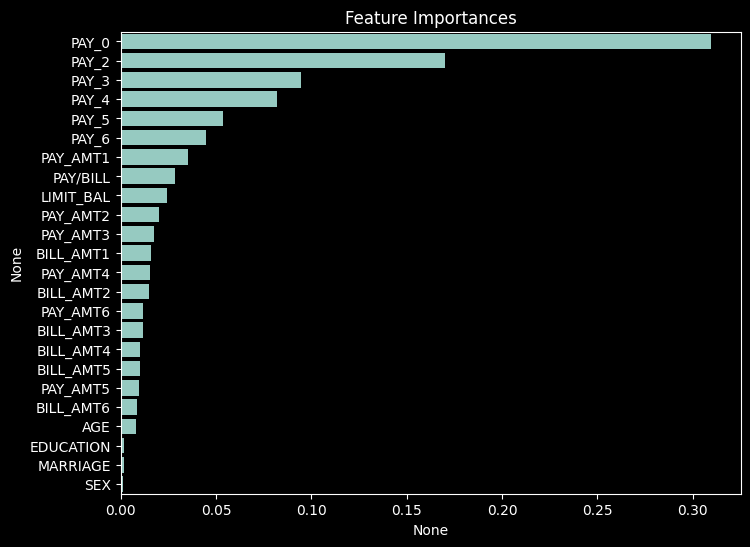

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.rc('xtick', labelsize=5)
plt.show()

### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfc)

# Model READ
clf_from_pickle = pickle.loads(saved_model)